In [1]:
# Author: Brent Artuch
# Date: 2024-10-04
import numpy as np
import sympy as sp
import scipy.constants as const
import spb
import pandas as pd
from IPython.display import *
import matplotlib.pyplot as plt

sp.init_printing()

## 1.3 - Probability
#### Discrete Variables
Imagine a room of 14 people with the following ages:
* 1 person age 14
* 1 person age 15
* 3 people age 16
* 2 people age 22
* 2 people age 24
* 5 people age 25
<br><br>
We can reference the number of people by age with the function $N(j)$, where $j$ is the age value.

In [2]:
R = [(1,14),(1,15),(3,16),(2,22),(2,24),(5,25)]
def number_of_people(age, R):
    for age_count in R:
        if age_count[1] == age:
            return age_count[0]
    print("No one in the room is the given age.")

number_of_people(22, R)

The total number of people $N$ can be expressed by the function: $$N=\sum_{j=0}^{\infty}N(j)$$

In [3]:
def total_number_of_people(R):
    total = 0
    for age_count in R:
        total += number_of_people(age_count[1], R)
    return total

total_number_of_people(R)

<Axes: title={'center': 'Number of People, $N(j)$, with $j$ age'}, xlabel='$j$', ylabel='$N(j)$'>

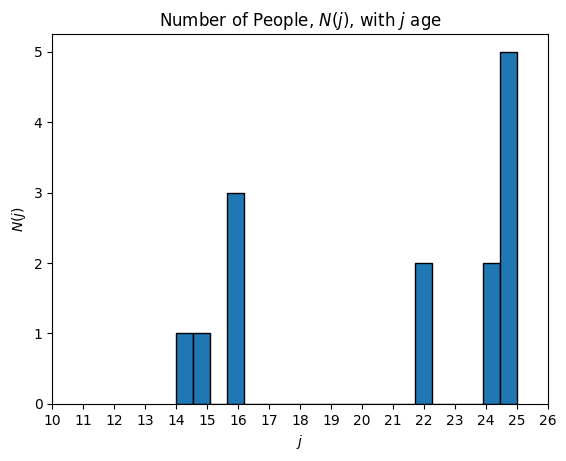

In [4]:
# Histogram plot showing the number of prople for each N(j)
data = [14,15,16,16,16,22,22,24,24,25,25,25,25,25]
room = pd.Series(data)
room.plot.hist(
    bins=20, title=r"Number of People, $N(j)$, with $j$ age", xlabel=r"$j$",
    ylabel=r"$N(j)$", xticks=list(range(10,27)), edgecolor="black"
)

The probability of someone being a particular age(s) can be expressed as: $$P(j)=\frac{N(j)}{N}=1$$

In [5]:
def probability_of_age(ages, R):
    num_people = 0
    for age in ages:
        num_people += number_of_people(age, R)
    probability = num_people/total_number_of_people(R)
    return probability

sp.nsimplify(probability_of_age([14,15], R), rational=True)

Average age is denoted: $$\langle j\rangle=\frac{\sum jN(j)}{N}=\sum_{j=0}^{\infty}jP(j)$$

In [6]:
def average_age(R):
    average = 0
    for age_count in R:
        average += age_count[1] * probability_of_age([age_count[1]], R)
    return average

average_age(R)

The average of a function of the age $j$ is given by: $$\langle f(j)\rangle=\sum_{j=0}^{\infty}f(j)P(j)$$

In [7]:
# Example 
j = sp.symbols("j")
def average_of_function(function, R):   
    average = 0
    for age_count in R:
        average += function.subs(j,age_count[1]) * probability_of_age([age_count[1]], R)
    return average

function = j**2
average_of_function(function, R)

The variance of the distribtuion is: $$\sigma^{2}\equiv\langle j^2\rangle-\langle j\rangle^2$$

In [8]:
def variance_of_ages(R):
    function = j**2
    return average_of_function(function,R) - average_age(R)**2

variance_of_ages(R)

The standard deviation is: $$\sigma=\sqrt{\langle j^2\rangle-\langle j\rangle^2}$$

In [9]:
def standard_deviation(R):
    return sp.sqrt(variance_of_ages(R))

standard_deviation(R)

#### Continuous Variables
Probability Density - The probability that $x$ lies between $a$ and $b$ is given by the integral.
$$
P_{ab}=\int_{a}^{b}\rho(x)dx
$$
Corresponding properties to match descrete variants:
\begin{align*}
&\int_{-\infty}^{+\infty}\rho(x)dx=1\\
&\langle x\rangle=\int_{-\infty}^{+\infty}x\rho(x)dx\\
&\langle f(x)\rangle=\int_{-\infty}^{+\infty}f(x)\rho(x)dx\\
&\sigma^{2}\equiv\langle x^2\rangle-\langle x\rangle^2
\end{align*}

Full Continuous Example:<br>
Object falls from Height $h$. One million distance measurements at random intervals are taken as the object falls (this large sample emulates the whole continuum). What is the time average of the distance traveled?<br>
Answer:<br>
In vacuum, the distance $x$ at time $t$ is:
$$
x(t)=\frac{1}{2}gt^2
$$
The velocity is $dx/dt = gt$, the total flight time is $T=\sqrt{2h/g}$, and the probability that a measurement was taken between $t$ and $t+dt$ is $dt/T$.<br> 
\begin{align*}
\frac{dt}{T}&=\frac{dx}{gt}\sqrt{\frac{g}{2h}}
\end{align*}
Solve for $t$ using the distance equation:<br>
\begin{align*}
x&=\frac{1}{2}gt^2\rightarrow 2x=gt^2\rightarrow \frac{2x}{g}=t^2\rightarrow t=\sqrt{\frac{2x}{g}}
\end{align*}
Plug in $t$ and solve:
\begin{align*}
\frac{dt}{T}&=\frac{dx\sqrt{g}}{g\sqrt{\frac{2x}{g}}\sqrt{2h}}=\frac{dx\sqrt{g}}{\sqrt{2xg}\sqrt{2h}}=\frac{dx}{\sqrt{2x}\sqrt{2h}}=\frac{dx}{2\sqrt{xh}}
\end{align*}
The probability density is:
\begin{align*}
\rho(x)=\frac{dx}{2\sqrt{xh}} \ \ \ \text{ where. } \ \ \ (0\le x\le h) 
\end{align*}
Check that the results equal 1:
\begin{align*}
\int_{a}^{b}\rho(x)dx=\int_{0}^{h}\frac{dx}{2\sqrt{xh}}=\frac{1}{2\sqrt{h}}\int_{0}^{h}\frac{1}{\sqrt{x}}dx=\frac{1}{2\sqrt{h}} (2\sqrt{x})\Big|_0^h=\frac{1}{2\sqrt{h}} (2\sqrt{h})=1
\end{align*}
Note: Recall that a definite integral from $a$ to $b$ in terms of $x$ is:
\begin{align*}
\int_{a}^{b}kx^{m}dx=k\int_{a}^{b}x^{m}dx=k\left( \frac{x^{m+1}}{m+1} \right)\Big|_a^b=k\left( \frac{b^{m+1}}{m+1} - \frac{a^{m+1}}{m+1}\right)
\end{align*}
Lastly, find the average distance (expectation value of $x$):
\begin{align*}
\langle x\rangle=\int_{0}^{h}x\frac{dx}{2\sqrt{xh}}=\frac{1}{2\sqrt{h}}\int_{0}^{h}\frac{x}{\sqrt{x}}dx=\frac{1}{2\sqrt{h}} \left(\frac{2x^{3/2}}{3}\right)\Big|_0^h=\frac{1}{2\sqrt{h}} \left(\frac{2h^{3/2}}{3}\right)=\frac{h^{3/2-1/2}}{3}=\frac{h}{3}
\end{align*}

True

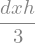

In [10]:
# Calculate with code
# Define the variables
h,x,g,t,dx = sp.symbols("h,x,g,t,dx")
# Define the distance equation x(t)
distance_equation = sp.Eq(sp.Rational(1,2)*g*t**2, x)
# Solve the distance equation for time t
de_in_terms_of_t = sp.solve(distance_equation, t)
# Set t equal to the positive value from the quadratic equation
t = de_in_terms_of_t[1]
# Define change in time dt
dt = dx/(g*t)
# Define total time T
T = sp.sqrt((2*h)/g)
# Solve dt/T
dt_over_T = dt/T
# Integrate to ensure the results equal 1
is_equal_to_one = sp.integrate(dt_over_T,(x,0,h)) == dx
# Find the average distance
average_x = sp.integrate(x*dt_over_T,(x,0,h))

# Display results 
display(is_equal_to_one)
display(average_x.simplify())

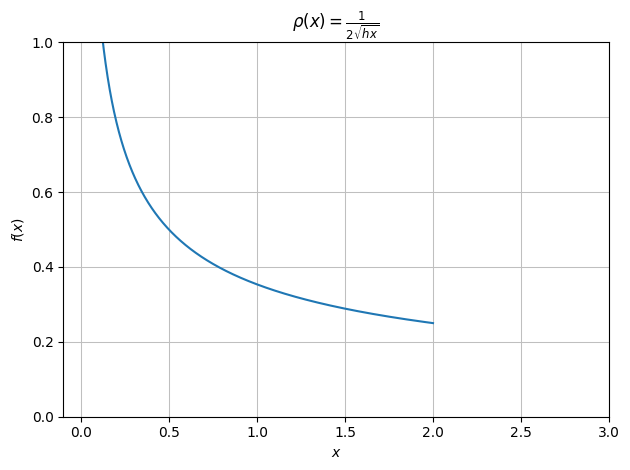

In [11]:
h = 2
# Note: the range of the funciotn begins ate 1/2h and the max probability , y, is 1.
spb.plot(1/(2*sp.sqrt(x*h)), (x,0.0000001,h), xlim=(-0.1,3), ylim=(0,1), title=r"$\rho(x)=\frac{1}{2\sqrt{hx}}$")

Find the standard deviation by first solving for $\langle x^2\rangle$: <br>
\begin{align*}
\langle x^2\rangle=\int_{0}^{h}x^2\frac{dx}{2\sqrt{xh}}=\frac{1}{2\sqrt{h}}\int_{0}^{h}\frac{x^2}{\sqrt{x}}dx=\frac{1}{2\sqrt{h}} \left(\frac{2x^{5/2}}{5}\right)\Big|_0^h=\frac{1}{2\sqrt{h}} \left(\frac{2h^{5/2}}{5}\right)=\frac{h^{5/2-1/2}}{5}=\frac{h^2}{5}
\end{align*}
Now we can calculate the variance $\sigma^2$:
\begin{align*}
\sigma^2=\langle x^2\rangle - \langle x\rangle^2=\frac{h^2}{5}-\frac{h}{3}^2=\frac{h^2}{5}-\frac{h^2}{9}=\frac{4h^2}{45}
\end{align*}
and finally the standard deviation $\sigma$:
\begin{align*}
\sigma=\sqrt{\frac{4h^2}{45}}=\frac{2h}{3\sqrt{5}}
\end{align*}

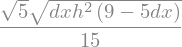

In [12]:
# Use sympy to find the standard deviation
h,x,g,t,dx = sp.symbols("h,x,g,t,dx")
average_squared_x = sp.integrate((x**2)*dt_over_T,(x,0,h))
sigma_squared = average_squared_x - average_x**2
sigma = sp.sqrt(sigma_squared)
sigma.simplify() 

In [13]:
# Prove that this does in fact equal the latex expression above
test_sigma = sp.lambdify((dx,h),sigma.simplify())
test_latex_sigma = sp.lambdify((h), (2*h)/sp.sqrt(45))
test_sigma(1,2) == test_latex_sigma(2)

np.True_

## Normalization
According to the statistical interpretation of the wave function, $|\Psi(x,t)|^2$ is the probability density for finding the particle at point $x$, at time $t$. since this is a probability it must have the following property:<br>
\begin{align*}
\int_{-\infty}^{+\infty}|\Psi(x,t)|^2dx=1
\end{align*}
$\Psi(x,t)$ must go to zero as $x$ goes to ($\pm$) $\infty$, otherwise the wave function would not be normalizable and it follows that:<br>
\begin{align*}
\frac{d}{dt}\int_{-\infty}^{+\infty}|\Psi(x,t)|^2dx=0
\end{align*}
so the integral is constant (independent of the time variable) and if $\Psi$ is normalized at $t=0$, it stays normalized for all other values of $t$.

Example: At time $t=0$ a particle is represented by the wave function:<br>
\begin{align*}
\Psi(x,0)=\begin{cases} 
A(x/a) & 0\leq x\leq a \\
A(b-x)/(b-a) & a\leq x\leq b \\
0 & \text{otherwise} 
\end{cases}
\end{align*}
where $A$, $a$, and $b$ are positive constants.<br>
<br>
a) Normalize $\Psi$ (find $A$ in terms of $a$ abd $b$).<br>
Answer: <br>
\begin{align*}
1&=\int_{-\infty}^{+\infty}|\Psi(x,0)|^2dx=\int_{0}^{a}|A|^2\frac{x^2}{a^2}dx+\int_{a}^{b}|A|^2\frac{(b-x)^2}{(b-a)^2}dx\\
&=|A|^2\left[\frac{x^3}{3a^2}\Big|_0^a+\frac{1}{(b-a)^2}\left(-\frac{(b-x)^3}{3}\right)\Big|_0^a\right]\\
&=|A|^2\left[\frac{a^3}{3a^2}+\frac{1}{(b-a)^2}\left(-\frac{(b-b)^3}{3}+\frac{(b-a)^3}{3}\right)\right]\\
&=|A|^2\left[\frac{a}{3}+\frac{1}{(b-a)^2}\left(\frac{(b-a)^3}{3}\right)\right]\\
&=|A|^2\left[\frac{a}{3}+\frac{b-a}{3}\right]=|A|^2\frac{b}{3}
\end{align*}
And thus $A$ in terms of $a$ and $b$ is $A=\sqrt{\frac{3}{b}}$

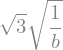

In [14]:
# Using code 
# Define variables and expressions
A,a,b,x = sp.symbols("A,a,b,x")
expr1 = x**2/a**2
expr2 = (b-x)**2/(b-a)**2

# Integrate
integral_0toa = sp.integrate(expr1,(x,0,a))
integral_atob = sp.simplify(sp.integrate(expr2,(x,a,b)))

# Solve for A
eq = sp.Eq(A**2*(integral_0toa+integral_atob),1)
A = sp.solve(eq,A)[1]
A

b) Plot $\Psi(x,0)$ as a function of x.<br>
Answer:

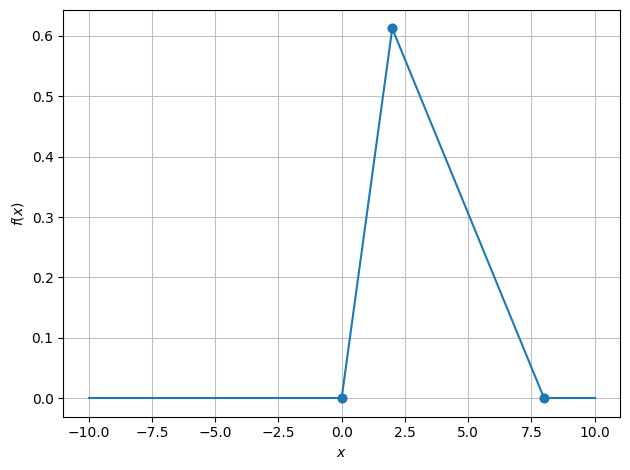

In [15]:
a=2
b=8
A = sp.sqrt(3/b)
f = sp.Piecewise(
    (A*(x/a), (0 <= x) & (x <= a)),
    (A*((b-x)/(b-a)), (a <= x) & (x <= b)),
    (0,True)
)

spb.plot_piecewise(f)

c) Where is the particle most likely to be found  at $t=0$?<br>
Answer:<br>
We need to solve the normalization equation for the portion of the function form $0$ to $a$:
\begin{align*}
\int_{0}^{a}|\Psi(x,t)|^2dx&=\int_{0}^{a}|A|^2\frac{x^2}{a^2}dx=\int_{0}^{a}\left|\sqrt{\frac{3}{b}}\right|^2\frac{x^2}{a^2}dx=\int_{0}^{a}\frac{3}{b}\frac{x^2}{a^2}dx\\
&=\frac{3}{ba^2}\frac{x^3}{3}\Big|_0^a=\frac{3}{ba^2}\frac{a^3}{3}=\frac{a}{b}
\end{align*}

In [16]:
# With code
# Define variables and expressions
a,b,x = sp.symbols("a,b,x")
A = sp.sqrt(3/b)
expr = A**2*(x**2/a**2)

# Integrate
integral_0toa = sp.integrate(expr,(x,0,a))
integral_0toa

d) What is the probability of finding a particle to the left of $a$ if $b=a$ or $b=2a$?<br>
Answer:<br>
This is a simple matter of plugging in the values of $b$ to the probability function we just calculated. So if $b=a$:
\begin{align*}
\frac{a}{b}=\frac{a}{a}=1
\end{align*}
and if $b=2a$ then:
\begin{align*}
\frac{a}{b}=\frac{a}{2a}=\frac{1}{2}
\end{align*}

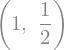

In [17]:
# Turn the expression into a function with b as the input
f = sp.lambdify(b,integral_0toa)
f(a),f(2*a)

e) What is the expectation value $\langle x\rangle$?<br>
Answer:<br>
\begin{align*}
\langle x\rangle&=\int_{-\infty}^{+\infty}x|\Psi(x,t)|^2dx=\int_{0}^{a}x|A|^2\frac{x^2}{a^2}dx+\int_{a}^{b}x|A|^2\frac{(b-x)^2}{(b-a)^2}dx\\
&=\int_{0}^{a}\frac{3x}{b}\frac{x^2}{a^2}dx+\int_{a}^{b}\frac{3x}{b}\frac{(b-x)^2}{(b-a)^2}dx\\
&=\frac{3}{a^2b}\int_{0}^{a}x^3dx+\frac{3}{b(b-a)^2}\int_{a}^{b}(b^2x-2bx^2+x^3)dx\\
&= \frac{3}{a^2b}\left(\frac{x^4}{4}\right)\Big|_0^a+\frac{3}{b(b-a)^2}\left(\frac{b^2x^2}{2}-\frac{2bx^3}{3}+\frac{x^4}{4}\right)\Big|_a^b\\
&=\frac{3a^2}{4b}+\frac{3}{b(b-a)^2}\left[\frac{b^4}{2}-\frac{2b^4}{3}+\frac{b^4}{4}-\left(\frac{b^2a^2}{2}-\frac{2ba^3}{3}+\frac{a^4}{4}\right)\right]\\
\end{align*}
Further simplification (that is far more than I'm wiling to type) would eventually give us $\langle x\rangle=\frac{2a+b}{4}$

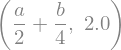

In [18]:
# The easy way 
# Define variables
a,b,x = sp.symbols("a,b,x")
A = sp.sqrt(3/b)

# Expressions to integrate
expr1 = x*(A**2)*(x**2/a**2)
expr2 = x*(A**2)*((b-x)**2/(b-a)**2)

# Integrate
integral_0toa = sp.simplify(sp.integrate(expr1,(x,0,a)))
integral_atob = sp.simplify(sp.integrate(expr2,(x,a,b)))

# Transform the final result into a function
expectation_value = sp.simplify(integral_0toa + integral_atob)
test_expectation_value = sp.lambdify((a,b),expectation_value) 

expectation_value, test_expectation_value(2,4)

## Velocity and Momentum
Recall that:
\begin{align*}
\langle x\rangle&=\int_{-\infty}^{+\infty}x|\Psi(x,t)|^2dx
\end{align*}
which can be rewritten as:
\begin{align*}
\langle x\rangle&=\int\Psi^*[x]\Psi dx
\end{align*}
where the operator $x$ represents position.<br>
<br>
Also, the velocity $v$ of an object is:
\begin{align*}
v=\frac{dx}{dt}
\end{align*}
The velocity of the expectation value $\langle v\rangle$ is:
\begin{align*}
\langle v \rangle=\frac{d\langle x\rangle}{dt}=\int x\frac{\partial}{\partial t}|\Psi|^2dx=\frac{i\hbar}{2m}\int x\frac{\partial}{\partial x}\left(\Psi^*\frac{\partial\Psi}{\partial x}-\frac{\partial\Psi^*}{\partial x}\Psi\right)dx=-\frac{i\hbar}{2m}\int\left(\Psi^*\frac{\partial\Psi}{\partial x}-\frac{\partial\Psi^*}{\partial x}\Psi\right)dx=-\frac{i\hbar}{m}\int\Psi^*\frac{\partial\Psi}{\partial x}dx
\end{align*}
which can be rewritten as:
\begin{align*}
\langle v\rangle&=\int\Psi^*[-i\hbar/m(\partial/\partial x)]\Psi dx
\end{align*}
where the operator $-i\hbar/m(\partial/\partial x)$ represents velocity.<br>
<br>
Recall that the momentum $p$ of an object is:
\begin{align*}
p=mv=m\frac{dx}{dt}
\end{align*}
The momentum of the expectation value $\langle p\rangle$ is:
\begin{align*}
\langle p\rangle=m\frac{d\langle x\rangle}{dt}=m\left(-\frac{i\hbar}{m}\right)\int\Psi^*\frac{\partial\Psi}{\partial x}dx=-i\hbar\int\Psi^*\frac{\partial\Psi}{\partial x}dx
\end{align*}
which can be rewritten as:
\begin{align*}
\langle p\rangle&=\int\Psi^*[-i\hbar(\partial/\partial x)]\Psi dx
\end{align*}
where the operator $-i\hbar(\partial/\partial x)$ represents momentum.<br>
<br>
Since, all classical dynamical variables can be expressed in terms of position $x$ and momentum $p$, we can calculate the expectation value of any quantity $Q(x,p)$ with the following expression:
\begin{align*}
\langle Q(x,p) \rangle=\int\Psi^*[Q(x,-i\hbar\partial/\partial x)]\Psi dx
\end{align*}
As an example, let us find the equation for the kinetic energy of the expectation value $\langle T\rangle$. Recall that:
\begin{align*}
T=\frac{1}{2}mv^2=\frac{p^2}{2m}
\end{align*}
Thus, the kinetic energy of the expectation value is:
\begin{align*}
\langle T\rangle=\frac{\langle p\rangle^2}{2m}=\frac{(-i\hbar)^2}{2m}\int\Psi^*\frac{\partial^2\Psi}{\partial x^2}dx=-\frac{\hbar^2}{2m}\int\Psi^*\frac{\partial^2\Psi}{\partial x^2}dx
\end{align*}
Note: the partial derivative of the wavefunction $\Psi$ with respect to position $x$ becomes second order.